### Importing Useful libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#loading the dataset

df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
#Looking at the shape(size) of the dataset

df.shape

(1461, 6)

In [ ]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# Checking if there is a null value (empty column) in the dataset

df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
# A brief description of the dataset

df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


#### Looking at each day, the date don't really influence the weather, it is the features of the day that aids the weather prediction. With this the date column will be dropped and we will work with the features of each day.

In [ ]:
df_1 = df.drop('date', axis=1)
df_1

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [ ]:
# Looking at the different weather condition we have 

df_1.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
# Looking at this result we have 5 categories for this. The best option is to use a model that does multi-classification

### Exploratory Data Analysis

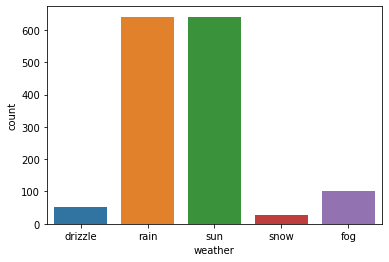

In [ ]:
# plotting to see the properties of the weather

sns.countplot(x = 'weather', data=df_1)

In [ ]:
# checking the exact counts of each weather category

df_1.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
# we have a larger percentage of rainy and sunny day.

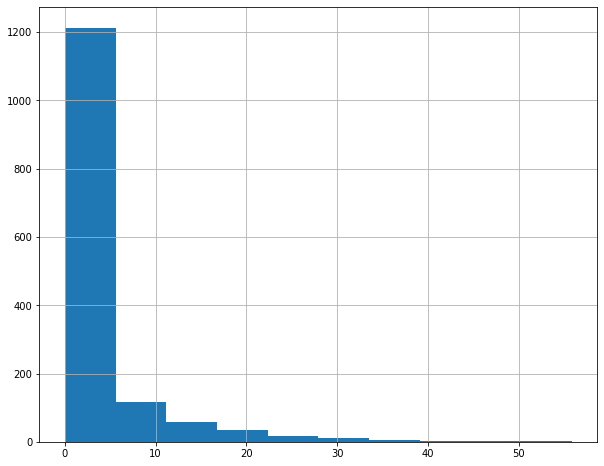

In [ ]:
# precipitation

df_1.precipitation.hist(figsize=(10, 8))

In [ ]:
df_1.precipitation.describe()

count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [ ]:
# This is really skewed. But considering the fact that we have lesser data, outliers won't be removed.

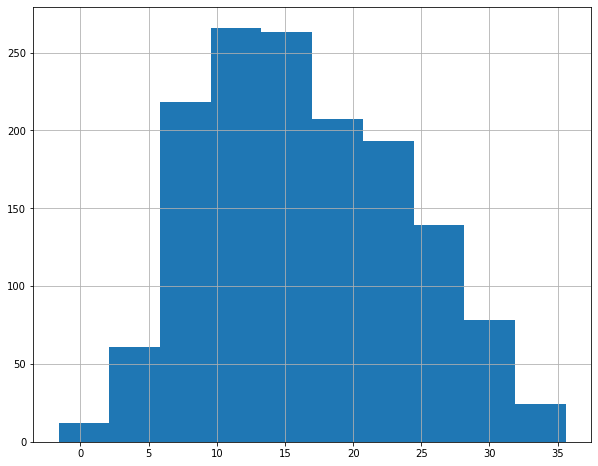

In [ ]:
# temp_max

df_1.temp_max.hist(figsize=(10, 8))

In [ ]:
df_1.temp_max.describe()

count    1461.000000
mean       16.439083
std         7.349758
min        -1.600000
25%        10.600000
50%        15.600000
75%        22.200000
max        35.600000
Name: temp_max, dtype: float64

In [ ]:
# this is quite balanced.

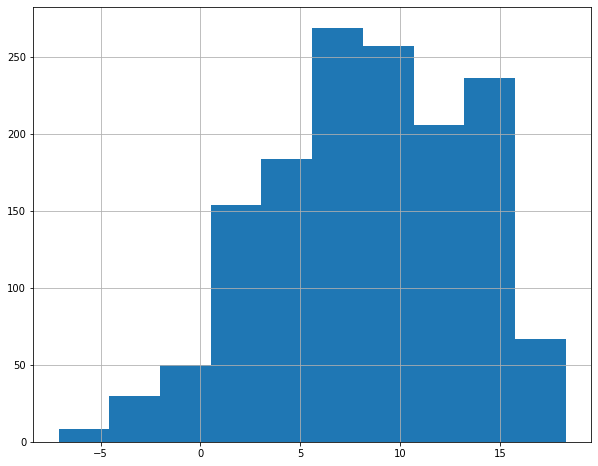

In [ ]:
# temp_min

df_1.temp_min.hist(figsize=(10, 8))

In [ ]:
df_1.temp_min.describe()

count    1461.000000
mean        8.234771
std         5.023004
min        -7.100000
25%         4.400000
50%         8.300000
75%        12.200000
max        18.300000
Name: temp_min, dtype: float64

In [ ]:
# This is quite skewed

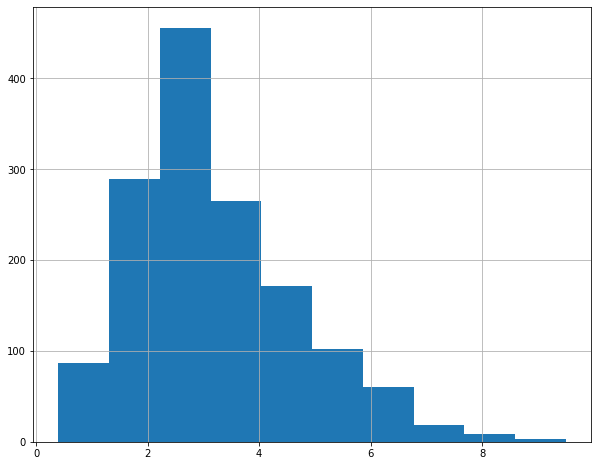

In [ ]:
# wind

df_1.wind.hist(figsize=(10, 8))

In [ ]:
df_1.wind.describe()

count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

In [ ]:
# This is also quite skewed.

#### Preprocessing

In [ ]:
# Extracting the target variable

label = df_1.weather
df_1 = df_1.drop('weather', axis=1)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2 = scaler.fit_transform(df_1)

In [ ]:
# Splitting to train and test set

train_set, test_set = train_test_split(df_2, test_size=0.25, random_state=1)
train_label, test_label = train_test_split(label, test_size=0.25, random_state=1)

train_set.shape, train_label.shape, test_set.shape, test_label.shape

((1095, 4), (1095,), (366, 4), (366,))

### Modeling

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250)
rf.fit(train_set ,train_label)


RandomForestClassifier(n_estimators=250)

In [ ]:
rf.score(test_set, test_label)

0.8169398907103825

In [ ]:
from sklearn.model_selection import cross_val_score

rf2 = cross_val_score(estimator = rf, X = train_set, y = train_label, cv = 10)
rf2.mean()

0.8301584653878231

#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(train_set, train_label)

gbc.score(test_set, test_label)

0.8142076502732241

In [ ]:
gbc2 = cross_val_score(estimator = gbc, X = train_set, y = train_label, cv = 10)
gbc2.mean()

0.8337698081734779

#### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_set, train_label)
svc.score(test_set, test_label)

0.7486338797814208

In [ ]:
svc2 = cross_val_score(estimator = svc, X = train_set, y = train_label, cv = 10)
svc2.mean()

0.7825437864887406

The best model is RandomForestClassifier.